In [19]:
%matplotlib inline
import pandas as pd

In [20]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [21]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Second Chance,1950
1,One Exciting Week,1946
2,Flowers (IV),2011
3,Stuntman,1968
4,Kaki kuda,1958


In [22]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [23]:
x=cast[(cast.character=="Superman") | (cast.character=="Batman")].groupby(["character","year"]).size().unstack(0).fillna(0)
len(x[x.Batman<x.Superman])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [24]:
len(x[x.Batman>x.Superman])

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

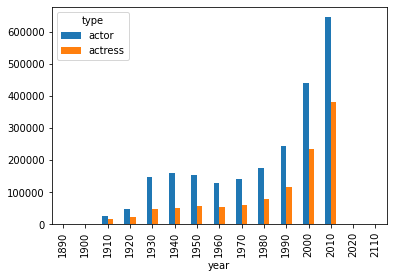

In [25]:
cast.groupby([(cast.year//10)*10,"type"]).size().unstack().plot(kind="bar")

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year'>

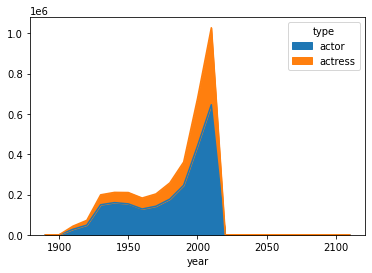

In [26]:
cast.groupby([(cast.year//10)*10,"type"]).size().unstack().plot(kind="area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

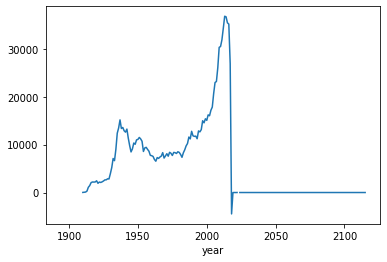

In [27]:
x=cast.groupby(["year","type"]).size().unstack("type")
x=(x.actor-x.actress)
x.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

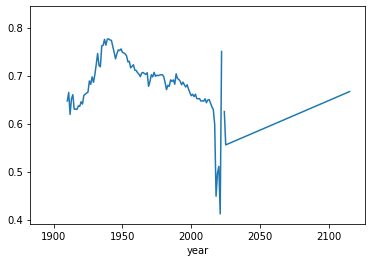

In [28]:
x=cast.groupby(["year","type"]).size().unstack("type")
x=(x.actor)/(x.actor+x.actress)
x.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

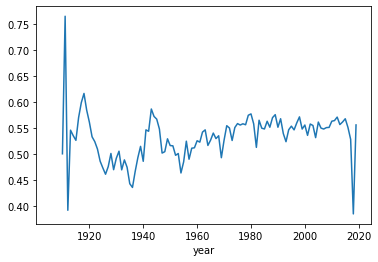

In [29]:
x=cast[cast.n==2].groupby(["year","type"]).size().unstack("type")
x=(x.actor)/(x.actor+x.actress)
x.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<AxesSubplot:xlabel='year'>

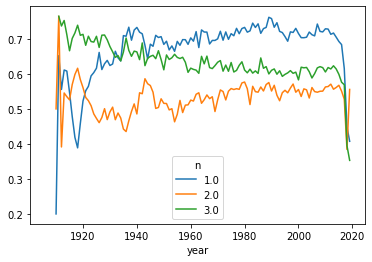

In [30]:
x=cast[(cast.n>=1) & (cast.n<=3)].groupby(["year","type","n"]).size().unstack("type").unstack("n")
x=(x.actor)/(x.actor+x.actress)
x.plot()